In [1]:
#Change path for data 
#Run once with rs as is 
#Then run again with rs as [3400,30]
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import csv
import os
import math
from sklearn.ensemble import RandomForestRegressor

In [2]:
rs = [3400,30]

data = np.load("C:/Users/19133/Documents/Research/Feldman/ML/ML Boxes/ML100-error4.npy")

redshift0 = data[:,0] 
distance0 = data[:,2]
distance_mod0 = data[:,1]
velocity0 = data[:,3]

inds = np.where(redshift0 <= rs[0])
redshift = redshift0[inds]
distance = distance0[inds]
distance_mod = distance_mod0[inds]
velocity = velocity0[inds]

X = np.stack([redshift/np.max(np.abs(redshift)), distance_mod/np.max(np.abs(distance_mod))],axis=-1)
y = np.stack([velocity/np.max(np.abs(velocity)), distance/np.max(np.abs(distance))],axis=-1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

regressor = RandomForestRegressor(n_estimators=500,max_depth=20000,random_state=0,n_jobs=10)
regressor.fit(X_train,y_train)

y_pred = regressor.predict(X_test)


C:\Users\19133\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


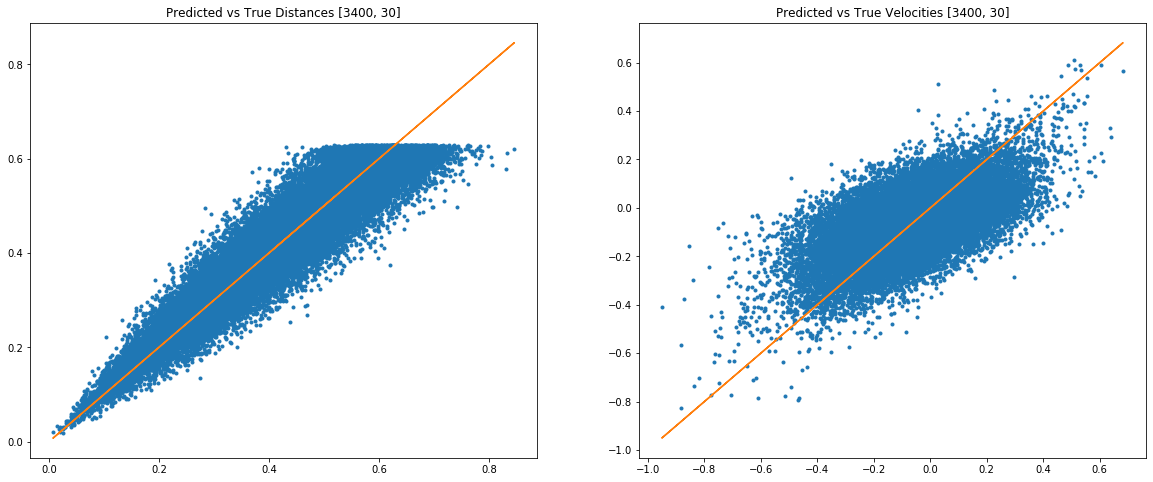

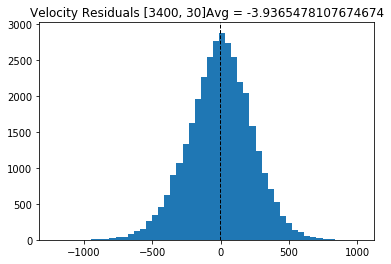

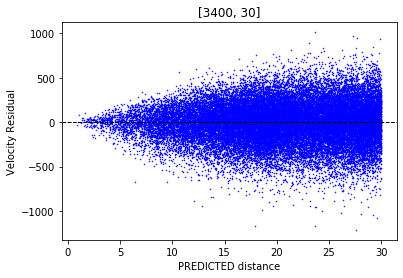

In [3]:
m = np.where(y_pred[:,1]*np.max(np.abs(distance)) <= rs[1])

predvel = y_pred[:,0][m]
preddist = y_pred[:,1][m]

fig = plt.figure()
fig.set_figheight(8) 
fig.set_figwidth(20) 

a = fig.add_subplot(1,2,1)
plt.plot(y_test[:,1][m],preddist,'.')
plt.plot(y_test[:,1][m],y_test[:,1][m])
plt.title('Predicted vs True Distances ' + str(rs))

a = fig.add_subplot(1,2,2)
plt.subplot(1, 2, 2)
plt.plot(y_test[:,0][m],predvel,'.')
plt.plot(y_test[:,0][m],y_test[:,0][m])
plt.title('Predicted vs True Velocities ' + str(rs))
plt.savefig('RF Predicted vs True Velocities ' + str(rs),transparent=True)
plt.show()
plt.clf()

vel_resids = (y_test[:,0][m] - predvel)*np.max(np.abs(velocity))
avg = np.mean(vel_resids)
plt.hist(vel_resids,bins=50)
plt.axvline(vel_resids.mean(), color='k', linestyle='dashed', linewidth=1)
plt.title('Velocity Residuals ' + str(rs) + 'Avg = ' + str(avg))
plt.savefig('RF Velocity Residuals ' + str(rs),transparent=True)

plt.show()
redshifts_final = X_test[:,0]*np.max(np.abs(redshift))
min(redshifts_final)


plt.plot(y_pred[:,1][m]*np.max(np.abs(distance)),vel_resids,'bo',markersize='.5')
plt.axhline(0, color='k', linestyle='dashed', linewidth=1)
plt.title(str(rs))
plt.xlabel('PREDICTED distance')
plt.ylabel('Velocity Residual')
#plt.ylim(-800,800)
plt.savefig('RF Residual Dist ' + str(rs),transparent=True)
plt.show()